In [1]:
import sys
sys.path.append('/local/moreka/broadcast-ref')

In [2]:
%matplotlib inline
from data.user import User
from data.db_connector import DbConnection
import matplotlib.pyplot as plt

In [3]:
conn = DbConnection()
user = User(790728, conn)

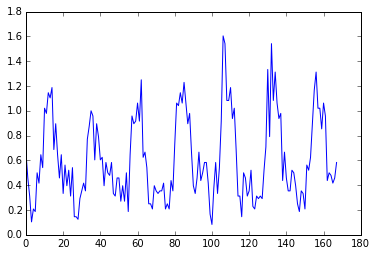

In [4]:
plt.plot(user.intensity().get_as_vector()[0])

In [5]:
user.followers()

[189843,
 709313,
 718993,
 724503,
 734073,
 742453,
 742973,
 743053,
 743813,
 752593,
 786141,
 786764,
 790680,
 791197,
 801651,
 816950,
 1092271,
 1769361,
 2171291,
 2172021,
 2172631,
 2173621,
 2209081,
 2212021,
 2214511,
 2228641,
 2251971,
 2279721,
 2284181,
 2285621,
 2377521,
 2387301,
 2396591,
 2421421,
 2559351,
 2559371,
 2643061,
 2714611,
 2738791,
 2800901,
 2802391,
 2816211,
 2828481,
 2841721,
 2876691,
 2950501,
 3043471,
 3062341,
 3118191,
 3124991,
 3126981,
 3127651,
 3162891,
 3163911,
 3168561,
 3172671,
 3209011,
 3223821,
 3291251,
 3545551,
 3653141,
 3684901,
 3716671,
 3737501,
 3880771,
 3926491,
 4135311,
 4280441,
 4487181,
 4525551,
 4539211,
 4540541,
 4782551,
 4859761,
 4921131,
 5113281,
 5351362,
 5391602,
 5498382,
 5502922,
 5504032,
 5525612,
 5567832,
 5630472,
 5665242,
 5714472,
 5753232,
 5771892,
 5785682,
 5795692,
 5813232,
 5858932,
 5930952,
 5963422,
 5976442,
 5991332,
 6010142,
 6023052,
 6100912,
 6167132,
 6195222,
 62578

In [6]:
# target = User(15391594, conn)
target = User(18949502 , conn)

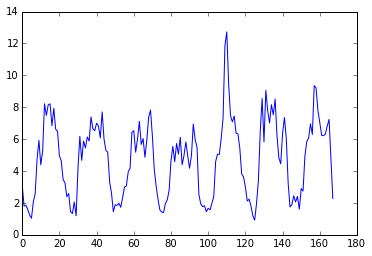

In [7]:
plt.plot(target.wall_intensity(user.user_id()).get_as_vector()[0])

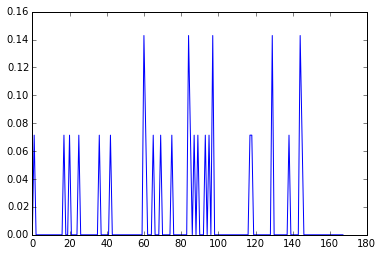

In [8]:
plt.plot(target.intensity().get_as_vector()[0])

In [9]:
user.optimum_intensity(target)

pi:  [0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0]
iter 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
iter 10
[ 0.80706522  0.45833333  0.15164274  0.15164259  0.15164236  0.15164172
  0.15164295  0.15164359  0.15164714  0.15164889  0.15164664  0.1516496
  0.15185873  0.16649204  0.63283655  2.08739592  1.73867739  2.01766209
  1.68387483  1.64900353  1.26041553  0.15164701  0.151645    0.15164463]
iter 20
[ 0.80706522  0.45833333  0.14893992  0.1489396   0.14893928  0.14893835
  0.14894037  0.14894171  0.14894872  0.14895166  0.14894775  0.14895189
  0.1491749   0.1648015   0.67231902  2.08739624  1.7386774   2.01766213
  1.68387492  1.64900354  1.26041559  0.14894849  0.14894461  0.14894387]
iter 30
[ 0.80706522  0.45833333  0.14629192  0.14629141  0.14629099  0.14628982
  0.14629262  0.

<data.models.Intensity instance at 0x7f640d735c68>

In [10]:
best_intensity = _

In [16]:
print best_intensity

(0.807, 1.00), (0.458, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00), (0.152, 1.00), (0.963, 1.00), (2.087, 1.00), (1.739, 1.00), (2.018, 1.00), (1.684, 1.00), (1.649, 1.00), (1.260, 1.00), (0.129, 1.00), (0.129, 1.00), (0.129, 1.00)


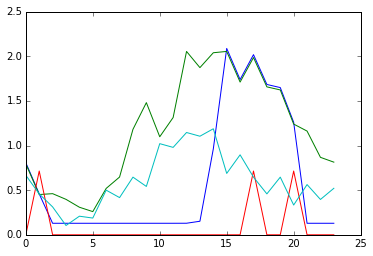

In [20]:
plt.plot(best_intensity.get_as_vector()[0])
plt.plot(np.array(target.wall_intensity(user.user_id()).sub_intensity(0, 24).get_as_vector()[0])/4.0)
plt.plot(np.array(target.connection_probability()[0:24]) * 10.0)
plt.plot(user.intensity().sub_intensity(0, 24).get_as_vector()[0])

In [23]:
from opt.optimizer import expected_f, expected_f_quad

e_time_before = expected_f(user.intensity().sub_intensity(0, 24),
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

e_time_after = expected_f(best_intensity,
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

e_time_before_ = expected_f_quad(user.intensity().sub_intensity(0, 24),
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

e_time_after_ = expected_f_quad(best_intensity,
                           target.wall_intensity().sub_intensity(0, 24),
                           15, pi=target.connection_probability()[0:24])

print e_time_before, e_time_after
print e_time_before_, e_time_after_

0.147580077754 0.183897525082
0.147588660874 0.183903625518
